In [ ]:
#debug pandas not importing
import sys
print(sys.executable)
#taking the information from the line above -- directly import pandas module in here -- this is some wizardry
! /Users/Amy/anaconda3/python.exe -m pip install pandas

Step 1 - import data into juypter notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Step 2 - Use matplotlib to make a barplot of the data and check for outliers

In [3]:
#import the data
df = pd.read_csv("DESEQ2NormalizedData.csv", index_col=0)
df.head()

df.shape #returns dimensions of the data

(289, 16232)

In [6]:
#swaps the x and y values
data = df.transpose()
data.shape

(16232, 289)

In [ ]:
#print(plt.style.available) list of available displays

plt.style.use('fast')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

fig.set_size_inches(50, 10.5)

plt.boxplot(data)
plt.xticks(rotation = 90)

plt.xlabel("Samples", size = 32)
plt.ylabel("Expression", size = 32)
plt.title("Normalization Barplot", size = 38)

x_ticks = list(df.index)
ax.set_xticklabels(x_ticks)

plt.show()

Step 3 - remove outliers; none exist
Step 4 - find library to convert gene ids into gene symbols - perhaps an R package or online resource?

Possible resource - https://www.researchgate.net/post/How-to-map-probe-ID-with-gene-symbol-in-GEO-dataset
Dataset - https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE125583
Official gene symbols (I think) - https://www.genenames.org/tools/search/

Steps for 4: 

Utilize API provided by NCBI to scrape gene information from data

Source: https://www.ncbi.nlm.nih.gov/home/develop/api/

Entrez appears to be the most promising since it offers databases for genes which is the one we're targeting.

Sample of what we want to achieve: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id=100093631
^From that, if I get the <Name> section of the gene and combine them together, then it's all set

Always returns xml file. 

Template: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id=[insert custom id parsed from data here]

In [ ]:
# "test" function to grab gene information

#need to write a script that automatically runs through the urls for me
import requests as r

# genes = "100093631"
#response = r.get(f"https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id={genes}") #created a template literal with variable that functions as the value
#print(response)

query = {'db': 'gene', 'id': '100093631,1,2,3,4,5,6,7,8,9'}
response = r.get('https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?', params=query)

#parse the xml file
import xml.etree.ElementTree as ET
root = ET.fromstring(response.content)
print(root[0][1][0].text) # <- this gives me the first one... woot!
print(root[0][2][0].text) # <- this is the next one!
print(root[0][3][0].text) # <- this gives the third one!
print(root[0][4][0].text) # <- this gives the fourth one!
print(root[0][5][0].text) # <- this gives the fifth one!
print(root[0][6][0].text) # <- this gives the sixth one!
print(root[0][7][0].text) # <- this gives the seventh one!
print(root[0][8][0].text) # <- this gives the eighth one!
print(root[0][9][0].text) # <- this gives the ninth (nineth) one!
print(root[0][10][0].text) # <- this gives the tenth one!

References: 
- Downloading Document Summaries: https://www.ncbi.nlm.nih.gov/books/NBK25500/#chapter1.Downloading_Document_Summaries
- API Requests tutorial: https://www.nylas.com/blog/use-python-requests-module-rest-apis/
- Using ElementTree: https://www.edureka.co/blog/python-xml-parser-tutorial/#findingelements

In [ ]:
# grab gene ids from csv file and pasted it into ids.txt
# Goal is to eventually create a dictionary that links the gene id with the gene symbol

import time  # will be useful when trying to puase the program for a while
import csv
file = open('DESeq2NormalizedData.csv')
csvreader = csv.reader(file)
header = []
header = next(csvreader) 
# header contains all of the items in the first row
# remove the first one since that's just a ''
header = header[1:]

# write into the file and then drag it onto the other row later on
with open('key.csv', 'w', newline="") as file:
    csvwriter = csv.writer(file)  # create csvwriter object
    csvwriter.writerow(header)  # write the header (aka the gene ids)

    # have to get the data before I write it
    data = []
    tempIDHolder = []
    # create a dictionary that links the gene id with the gene symbol
    for id in header:
        tempIDHolder.append(id)
        if (len(tempIDHolder) >= 10):
        # request a downloadable summary, etc.
            # first convert the tempIDHolder into actual id value
            id = tempIDHolder[0]
            counter = 0
            for item in tempIDHolder:
                if counter == 0:
                    counter += 1
                else :
                    id = id + ',' + item # hopefully this gets everything?
            # print(id)
            query = {'db': 'gene', 'id': id}
            response = r.get(
                'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?', params=query)
            root = ET.fromstring(response.content)
            data.append(root[0][1][0].text)
            data.append(root[0][2][0].text)
            data.append(root[0][3][0].text)
            data.append(root[0][4][0].text)
            data.append(root[0][5][0].text)
            data.append(root[0][6][0].text)
            data.append(root[0][7][0].text)
            data.append(root[0][8][0].text)
            data.append(root[0][9][0].text)
            data.append(root[0][10][0].text)
            # make it pause or else the API will yell at me (it was like 3 requests per second if I remember correctly)
            # make it sleep for half a second... therefore it should be like 2 requests per second
            # print(root[0][1][0].text)
            time.sleep(.5)
            # reset tempIDHolder
            tempIDHolder.clear()

    csvwriter.writerow(data)

In [ ]:
#find the gene ids that I am still missing (since I did it by factors of 10) and manually modify the key.csv
print(len(header))
# result: 16232, so that means I only have to get two, phew!

In [ ]:
# double checking my computer's capability to handle large array sizes - source: https://stackoverflow.com/questions/855191/how-big-can-a-python-list-get#:~:text=According%20to%20the%20source%20code,PY_SSIZE_T_MAX%2Fsizeof(PyObject*)%20.&text=On%20a%20regular%2032bit%20system,bit%20system%20is%20536%2C870%2C912%20elements.
import six
print(six.MAXSIZE)
# result: 9223372036854775807, so yeah it should be fine

Resources:
- Manipulating csv file to get just the header: https://www.analyticsvidhya.com/blog/2021/08/python-tutorial-working-with-csv-file-for-data-science/
- How to manipulate python dictionaries: https://www.geeksforgeeks.org/python-dictionary/

Replace DF ids with Gene Symbols

In [7]:
# import conversion library
translate = pd.read_csv("key.csv")
translate.head()

,1,100,1000,10000,100009676,10001,10003,100037417,10004,100049716,...,9987,9988,9989,999,9990,9991,9992,9993,9994,9997
0,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2


In [8]:
colNames = list(translate.iloc[0, :])

DataTot = df.set_axis(colNames, axis=1, inplace=False)
DataTot.head()

,A1BG,ADA,CDH2,AKT3,ZBTB11-AS1,MED6,NAALAD2,DDTL,NAALADL1,NINJ2-AS1,...,HNRNPDL,DMTF1,PPP4R1,CDH1,SLC12A6,PTBP3,KCNE2,DGCR2,CASP8AP2,SCO2
GSM3577568,8.103918,7.937909,10.257489,11.186453,5.995394,7.667819,9.199965,10.280796,6.549983,6.243322,...,11.221806,10.175303,10.056090,5.454826,9.981236,8.396273,5.518956,11.268024,6.487247,9.417459
GSM3577569,7.009610,7.902695,10.120491,10.939458,6.258109,7.682248,7.454174,8.647815,6.885065,6.598184,...,12.246937,11.343959,10.626753,7.470028,10.016374,8.426003,3.276256,11.831612,8.417852,8.438144
GSM3577570,7.046131,7.680613,10.303429,11.387845,6.331885,7.715589,8.728490,8.635666,6.113245,6.541339,...,12.492072,11.431233,10.663922,8.280252,10.833722,8.928075,2.653813,11.588094,9.232752,8.337510
GSM3577571,7.486468,7.611999,10.277881,11.121012,5.280793,7.842296,8.047696,9.168947,6.455880,6.257334,...,11.654149,10.630377,10.269111,5.818450,9.913436,8.332221,4.326597,11.708139,7.896452,9.286598
GSM3577572,7.553102,8.112529,10.274801,11.085076,6.112529,7.578193,7.974453,8.771874,6.264532,7.089446,...,11.903434,10.865720,10.183736,5.993230,10.011766,8.448132,4.383177,11.705105,8.359251,9.140874


Select genes to focus on

Genes extracted from DE here: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE132651

In [13]:
# I used a Google script and ripped off an array and just copy pasted it here. Is it clean? Haha no
gene_list = ["MMP1", "TFPI2", "ANGPT2", "SULF1", "SULF1", "FABP4", "ANGPT2", "IL1RL1", "TFPI2", "ADGRF5", "FST", "VAMP8", "SULF1", "MRC1", "TOX", "BASP1", "EMCN", "LYVE1", "COL4A5", "MMP10", "ANKRD1", "TACSTD2", "GULP1", "RASGRP3", "LEPROT///LEPR", "GULP1", "NUPR1", "PBK", "SULT1E1", "ADGRF5", "PROS1", "EPB41L3", "ALDH1A1", "PFN2", "FABP5", "TSPAN13", "FGF13", "LIMCH1", "GMFG", "IL1R1", "PDE2A", "SRSF6", "TGFB2", "LYN", "CLU", "LBH", "MIR6787///SLC16A3", "EPB41L3", "CHST15", "ANOS1", "TIMP3", "RRM2", "RGCC", "MIR6787///SLC16A3", "EPB41L3", "FST", "HSD17B2", "GULP1", "THSD7A", "SLC6A15", "LTBP1", "COL13A1", "LIMCH1", "KRT7", "ANXA3", "MAD2L1", "LAMP3", "DYSF", "SLC35F6///CENPA", "CLEC2B", "LDB2", "LTBP1", "LYVE1", "DKK1", "RPS4Y1", "SLIT2", "DPYSL3", "FBLN5", "NRP2", "CXCR4", "C10orf10", "CLU", "NRG1", "CSGALNACT1", "HJURP", "ASPM", "PLA2G4C", "ADIRF", "TOP2A", "BST2", "CD44", "HLA-B", "LIMCH1", "TGFB2", "DLGAP5", "SULT1B1", "SACS", "COL3A1", "HMMR", "LOC101930400///AKR1C2", "TIMP3", "IFI27", "BMP4", "NID1", "UCHL1", "NDC1", "SHCBP1", "LYN", "EMP3", "CCND2", "CCL15-CCL14///CCL14", "CDC20", "MAFB", "GPX3", "AURKA", "PTTG1", "RFC3", "BCAT1", "RBP1", "MEIS2", "CCNB1", "SH3BP5", "VCAM1", "CKS1B", "PRC1", "JUP", "GJA4", "NCAPG", "LYPD1", "BCHE", "TMEM140", "IGFBP2", "CCND2", "HOXA10-HOXA9///MIR196B///HOXA9", "AKR1C1", "TNFSF10", "PODXL", "IL13RA2", "SPC25", "UBE2S", "GYPC", "NDC80", "ABCG1", "CEP55", "EIF1AY", "GATA6", "GPRC5A", "PDPN", "TNFSF10", "CD36", "RELN", "CCNA2", "CSF2RB", "ANPEP", "CDK1", "GJA4", "MT1M", "TRPV2", "RRM2", "CLU", "GPX3", "TGFBR2", "CCNA1", "SMC2", "UBD///GABBR1", "TGFB2", "ADD3", "FHL1", "KIAA0101", "MELK", "SQRDL", "PIEZO2", "RRP15", "DEPDC1", "XIST", "TPD52", "SOX18", "OIP5", "MFAP2", "MPZL2", "TMPO", "CCNA2", "TPX2", "TRIP13", "PCDH7", "PLPP3", "PCNA", "PTPRN2", "POSTN", "NRP2", "BACE2", "NPTX2", "DKK3", "PLOD2", "TGFBR2", "SPRY1", "HSPD1", "MT1X", "KIF20A", "CENPN" ]

len(gene_list)

200

In [14]:
# see which ones match
colNames = list(DataTot.columns)

geneOverlap = list(set(gene_list).intersection(colNames))
len(geneOverlap)

120

In [15]:
selectDf = DataTot.loc[:, geneOverlap[0:100]]
# create an excel file of the dataframe
# selectDf.to_excel("completeDataset.xlsx")
selectDf.head()

,PCDH7,NUPR1,ANXA3,TMPO,LYPD1,NDC1,VAMP8,PLOD2,CCND2,SLIT2,...,ANOS1,PODXL,DYSF,HSPD1,LYVE1,DKK3,MRC1,TRIP13,GYPC,GULP1
GSM3577568,9.134945,12.744425,7.503189,8.878037,11.566198,7.667819,8.809175,8.487247,10.489249,7.145141,...,7.471127,10.897769,10.116928,12.644201,10.810777,14.082691,8.463000,5.995394,9.233799,3.317322
GSM3577569,7.914330,10.917224,9.091319,9.316272,9.670290,7.787218,7.914330,8.497360,10.859715,8.908524,...,7.114199,12.708380,10.984995,9.852173,8.004177,13.280336,5.976696,5.239730,9.119235,5.787218
GSM3577570,8.946595,10.962152,9.086773,9.805591,9.063204,8.208402,7.847585,9.004310,10.301991,9.250748,...,6.961242,11.530330,11.970774,10.018386,8.843638,12.592805,8.671735,4.855447,9.018386,5.286081
GSM3577571,8.911559,10.787052,8.354503,8.777808,9.974055,7.516421,9.074789,8.424629,11.137971,8.435121,...,6.984808,11.559617,10.037403,10.376445,9.752861,13.763698,5.911559,5.370991,8.802330,4.574524
GSM3577572,8.929665,10.688879,8.939380,9.074829,10.601836,7.364068,7.955428,8.544640,10.460555,8.123934,...,7.689838,12.243774,11.127480,10.786301,8.610983,13.643539,7.619065,4.835689,8.429870,5.042140


Make dataset

In [33]:
# create 70/30 split
shuffledData = selectDf.sample(frac=1, random_state=42)
shuffledData.head()

,PCDH7,NUPR1,ANXA3,TMPO,LYPD1,NDC1,VAMP8,PLOD2,CCND2,SLIT2,...,ANOS1,PODXL,DYSF,HSPD1,LYVE1,DKK3,MRC1,TRIP13,GYPC,GULP1
GSM3577613,10.912153,9.126512,8.500604,9.583430,8.866449,8.211097,6.967172,9.417949,11.051840,9.011566,...,8.041172,10.524988,10.390785,10.214100,7.730471,14.197129,7.391670,6.763638,7.304207,6.433490
GSM3577725,7.851302,13.006739,8.271519,8.793057,10.667526,6.882108,8.397697,8.798450,10.718203,6.776755,...,7.432800,12.433667,9.648240,12.591119,9.526777,14.162290,6.539716,5.124678,9.302216,5.539716
GSM3577842,9.005327,11.865658,8.397895,9.730176,10.305052,7.676827,7.867824,8.986848,10.407851,7.802906,...,7.187442,11.409339,11.682169,12.175544,8.954608,13.416754,7.509370,5.516749,8.802906,4.856236
GSM3577610,10.368761,9.715583,8.294181,8.635462,9.851038,7.801313,8.280197,8.540887,11.076131,9.132351,...,6.741330,10.276679,9.846300,9.964695,7.142693,14.265262,4.261337,5.713850,8.685835,5.405727
GSM3577749,11.081365,8.380236,7.659113,9.195675,8.519639,8.064269,5.987918,8.596213,11.460477,9.753222,...,7.639282,10.892716,10.265256,10.007388,6.865236,14.269697,6.644265,5.839396,6.813084,6.654181


In [ ]:
x, y = shuffledData.shape
splitThreshold = round(x*.7)

TrainData = shuffledData.iloc[0:splitThreshold, :]
TestData = shuffledData.iloc[splitThreshold:, :]

In [ ]:
# create input and output set (50/50) for now, but may change later
# randomize columns
tempShuffleDf = TrainData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=500)
TrainData = tempShuffleDf.T
tempShuffleDf = TestData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=500)
TestData = tempShuffleDf.T

# split the data
x_train = TrainData.iloc[:, 0:50]
y_train = TrainData.iloc[:, 50:]

x_test = TestData.iloc[:, 0:50]
y_test = TestData.iloc[:, 50:]

# print(tempShuffleDf.T) #note .T transposes/reverses the data
y_test.head()

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Train Random Forest

I used classification first simply because it was the first one lol... future Amy here. Turns out I should be using regression instead or else I run into a 'continuous-multioutput' error... 

In [ ]:
# importing sklearn (and pandas again) because my computer doesn't recognize it
! /Users/Amy/anaconda3/python.exe -m pip install sklearn

In [ ]:
# ml import
from sklearn.ensemble import RandomForestRegressor

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(df.iloc[0, 0])
print('---------')
print(selectDf.head(0).columns)

In [ ]:
# instantiate model and train
reg = RandomForestRegressor(n_estimators=400, random_state=42)
reg.fit(x_train, y_train) #nah this should work... but it just doesn't quite match the actual thing nicely

Test Random Forest

In [ ]:
y_pred = reg.predict(x_test)

In [ ]:
print(y_test.shape, y_pred.shape) #wtf y_pred is already a numpyarray whereas y_test is the one that isn't
ny_test = y_test.to_numpy()
print(y_pred[:, 0]) #only the predicted values for the first gene
print(ny_test[:, 0]) #only the actual values for the first gene

In [ ]:
df2 = pd.DataFrame()
df2['Predicted'] = y_pred[:, 0]
df2['Actual'] = ny_test[:, 0]

df2

In [ ]:
print(y_pred[:, 0].tolist())
print(ny_test[:, 0].tolist())

In [ ]:
#experimental function to find the percent difference error
predicted = [7.090191573100002, 7.458117004670004, 8.600444416470005, 7.788848798920004, 8.40825437213, 7.020327500409999, 8.818133271350002, 7.8266646558799975, 6.9378079908900006, 6.872748400490001, 7.506390345189996, 8.676429359800004, 8.554343255570004, 7.166067258440004, 8.747529485299998, 7.968960927520005, 7.452849082630001, 7.761508404270005, 8.320082494520001, 7.971978045290004, 6.697892382179999, 8.949659341020002, 8.5578288482, 8.959041092180001, 8.720058047870003, 9.099238304330001, 6.597845043869999, 8.771403687159996, 8.97738436032, 9.337057343459998, 8.615097380400004, 8.379626407890001, 6.837338580420003, 6.728788978850002, 6.72586007986, 8.569162017440004, 8.760991396020003, 6.398245022990002, 8.775553368840006, 8.599701066330004, 6.706699092590001, 7.119638600939998, 7.276036668970002, 8.70239843987, 7.404154973279999, 8.162479427099996, 6.613187798319999, 8.779790491420004, 8.06791024708, 7.6901312955200005, 6.943329752419999, 7.805397315200001, 7.597572052499999, 7.180362284900005, 8.814388118280004, 8.770979079269997, 8.452227193040002, 8.525045438540001, 7.466116578500001, 6.994484173059999, 7.585299090140003, 8.753943669680002, 8.870920817819997, 7.499310703240001, 9.286605262920002, 7.215856328890001, 9.01209597088, 8.669163431630004, 7.186433201240003, 7.302876306980005, 8.488108625080002, 7.504864159039996, 7.927865327730001, 6.44979854136, 7.310411780489999, 8.626030034680007, 8.696088902549997, 7.079432411410002, 8.071684938880002, 8.670569142679998, 7.816587408060005, 8.141853975380002, 8.353289437620003, 8.788246874929996, 8.285601362710002, 8.440699586870002, 8.812269140540002]
actual = [6.897812565, 7.338213509, 8.702359981, 7.948689744, 8.542811765, 6.837543279, 9.269233796, 8.330263567, 6.537387668, 7.477668772, 7.705141327, 8.388086398, 9.047330902, 7.177687891, 10.07887491, 9.96112512, 8.251808157, 6.519026254, 8.593129162, 8.215544999, 7.127999315, 10.67614923, 8.178851803, 9.602720917, 8.661232602, 9.332002144, 5.497343234, 8.824692683, 9.209058607, 10.23649005, 9.169253621, 8.778581143, 7.461903599, 5.902414739, 6.728518061, 9.278008069, 8.990431014, 6.179569244, 9.553214953, 9.109478527, 5.240724147, 6.385636127, 7.785670875, 7.881095765, 7.66056203, 7.875984985, 6.533125215, 8.506735274, 8.547510836, 7.644934135, 7.248378845, 8.506008575, 7.605692603, 7.694407888, 9.458641893, 8.627903977, 9.76776567, 8.207819731, 7.342463366, 7.43472634, 8.535281792, 8.828590939, 9.350347751, 7.530876833, 9.484744463, 7.558263108, 9.522007793, 9.427759537, 8.263312582, 7.284029873, 8.352555076, 6.142537446, 8.535022869, 5.554148673, 7.672479957, 8.185338403, 8.421832893, 7.733339952, 9.832547685, 8.320524407, 8.941760952, 9.285487465, 9.122246483, 8.718260929, 8.794853801, 8.622207487, 10.1410804]

# find the percent difference of each value, add them up and divide by 87 to find average percent difference
averagePercentDifference = 0
for index in range(87):
    # percent difference equation: |pred-actual|/actual
    averagePercentDifference += abs(predicted[index]-actual[index])/actual[index] * 100
# divided by 87
averagePercentDifference /= 87

averagePercentDifference

# Combining the previous steps to check reliability and run tests repeatedly

In [1]:
# run this test multiple times... because I am not convinced of the results
import pandas as pd
import random
# ml import
from sklearn.ensemble import RandomForestRegressor

averagePercentDifference = 0
numTrials = 1
for i in range(numTrials):
    # convert the completeDataset.xlsx into a pandas dataframe because I don't want to redo the previous steps over and over again every time I reopen the notebook
    selectDf = pd.read_excel("completeDataset.xlsx", index_col=0)

    randNum = random.randrange(500)
    # create 70/30 split of training and testing datasets
    shuffledData = selectDf.sample(frac=1, random_state=42)

    x, y = shuffledData.shape
    splitThreshold = round(x*.7)

    TrainData = shuffledData.iloc[0:splitThreshold, :]
    TestData = shuffledData.iloc[splitThreshold:, :]

    # create input and output set (50/50) for now, but may change later
    # randomize columns
    tempShuffleDf = TrainData.T
    tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=randNum)
    TrainData = tempShuffleDf.T
    tempShuffleDf = TestData.T
    tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=randNum)
    TestData = tempShuffleDf.T

    splitIndex = 80 #first {splitIndex} will be used as input variables

    # split the data
    x_train = TrainData.iloc[:, 0:splitIndex]
    y_train = TrainData.iloc[:, splitIndex:]

    x_test = TestData.iloc[:, 0:splitIndex]
    y_test = TestData.iloc[:, splitIndex:]

    # instantiate model and train
    reg = RandomForestRegressor(n_estimators=100, random_state=42)
    reg.fit(x_train, y_train)

    # actually train the model
    y_pred = reg.predict(x_test)
    ny_test = y_test.to_numpy()

    x, y = y_pred.shape
    for row in range(x):
        for col in range(y):
            # calculate the percent difference for the value
            averagePercentDifference += abs(y_pred[row][col] - ny_test[row][col])/ny_test[row][col]
    averagePercentDifference /= (x*y)

averagePercentDifference*100

5.469987582069285

Tuning the hyperparameters - source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [2]:
from pprint import pprint

print('Parameters currently in use: \n')
pprint(reg.get_params())

Parameters currently in use: 

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


# Cross Validation Testing

In [3]:
# from the article it states that the most important hyperparameters is the n_estimators (# of trees), number of features (max_features)
# possible adjustments to be made and explanation
'''
n_estimators = number of trees in the foreset
max_features = max number of features considered for splitting a node
max_depth = max number of levels in each decision tree
min_samples_split = min number of data points placed in a node before the node is split
min_samples_leaf = min number of data points allowed in a leaf node
bootstrap = method for sampling data points (with or without replacement)
'''
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)
# total of 4320 possible settings

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


Random Search Training

In [6]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 1, cv = 3, verbose=2, random_state=42, n_jobs = -1) #n_iter used to be 100
# Fit the random search model
rf_random.fit(x_train, y_train)
# rf_pred = rf_random.predict(x_test) # something new I added... maybe check it out later

rf_random.best_params_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [7]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    errors = errors.to_numpy()
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors))) #idk if this works as intended ngl
    print('Accuracy = {:0.2f}%.'.format(np.mean(accuracy.to_list())))
    
    return accuracy
# base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
# base_model.fit(x_train, y_train)
# base_accuracy = evaluate(base_model, x_test, y_test)

base_accuracy = evaluate(reg, x_test, y_test)

print()

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_test, y_test)

Model Performance
Average Error: 0.3980 degrees.
Accuracy = 94.53%.

Model Performance
Average Error: 0.4223 degrees.
Accuracy = 94.21%.


# Grid Search with Cross Validation

In [8]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [50, 100, 150], #why is it these values... idk myself ngl
    'max_features': [13, 15, 17, 19, 21], #idk for these values either tbh... maybe research later
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100, 200, 300, 400, 500]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# fit the grid search to the data
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 150 candidates, totalling 450 fits


KeyboardInterrupt: 

In [ ]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)

Model Performance
Average Error: 0.4243 degrees.
Accuracy = 93.83%.


# Analyze the Results

In [9]:
from sklearn.metrics import mean_squared_error

# multidimensional RMSE calculation
def MDRMSE(predy, testy): # multi-dimensional RMSE
    # rows are samples
    # columns are genes
    # iterate through each sample and take gene distribution calculate RMSE and add to list

    # should be iterating through every predicted y value instead, fixed it
    x, y = predy.shape
    allRMSE = []
    
    for col in range(y):
        pred = predy.iloc[:, col]
        test = testy.iloc[:, col]
        rmse = mean_squared_error(test, pred)
        allRMSE.append(rmse)
    
    # Calculate sum of list and divide by number of items
    averageRMSE = sum(allRMSE)/len(allRMSE)
    
    # return the aggregated RMSE
    return averageRMSE

In [11]:
# RMSE module provided by sklearn -- source: https://stackoverflow.com/a/60507671/15073477
from sklearn.metrics import mean_squared_error

def SKLEARNRMSE(y_pred, y_test):
    return mean_squared_error(y_test, y_pred, squared=False)

In [12]:
#Percent Difference Error

def PDE(y_pred, y_test):
    averagePercentDifference = 0
    x, y = y_pred.shape
    for row in range(x):
        for col in range(y):
            # calculate the percent difference for the value
            averagePercentDifference += abs(y_pred[row][col] - y_test[row][col])/y_test[row][col]
    averagePercentDifference /= (x*y)
    return averagePercentDifference*100

In [13]:
from sklearn.metrics import r2_score

# more info about multioutput parameter: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

# R^2 function
def R2_SCORE(y_pred, y_test, modelType):
    if (modelType == 'FOREST'): # source: https://stats.stackexchange.com/questions/7357/manually-calculated-r2-doesnt-match-up-with-randomforest-r2-for-testing?noredirect=1&lq=1
        return r2_score(y_test, y_pred, multioutput='variance_weighted')
    elif (modelType == 'PLS'): # source: https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=Solution,into%20the%20regression%20line%20equation.
        return r2_score(y_test, y_pred)
    else:
        print("The only values accepted are \'FOREST\' and \'PLS\'.")
        return #can I not add a return here?


In [14]:
RMSerror = MDRMSE(pd.DataFrame(y_pred), y_test)
percentError = PDE(y_pred, y_test.to_numpy())
R2_1 = R2_SCORE(y_pred, y_test, 'FOREST')
R2_2 = R2_SCORE(y_pred, y_test, 'PLS')

print("Predicted values are all from initial \"Forest\" model")
print("Root Means Squared Error: ", end="")
print(RMSerror)
print("Percent Difference Error: ", end="")
print(percentError)
print("R2 SCORE - as a forest: ", end="")
print(R2_1)
print("R2 SCORE - as a PLS: ", end="")
print(R2_2)

Predicted values are all from initial "Forest" model
Root Means Squared Error: 0.2993102508463322
Percent Difference Error: 5.469987582069285
R2 SCORE - as a forest: 0.5803029081149491
R2 SCORE - as a PLS: 0.52458382606413


# Create Residual Plots to show Performance of Forest is Working

<Figure size 432x288 with 0 Axes>

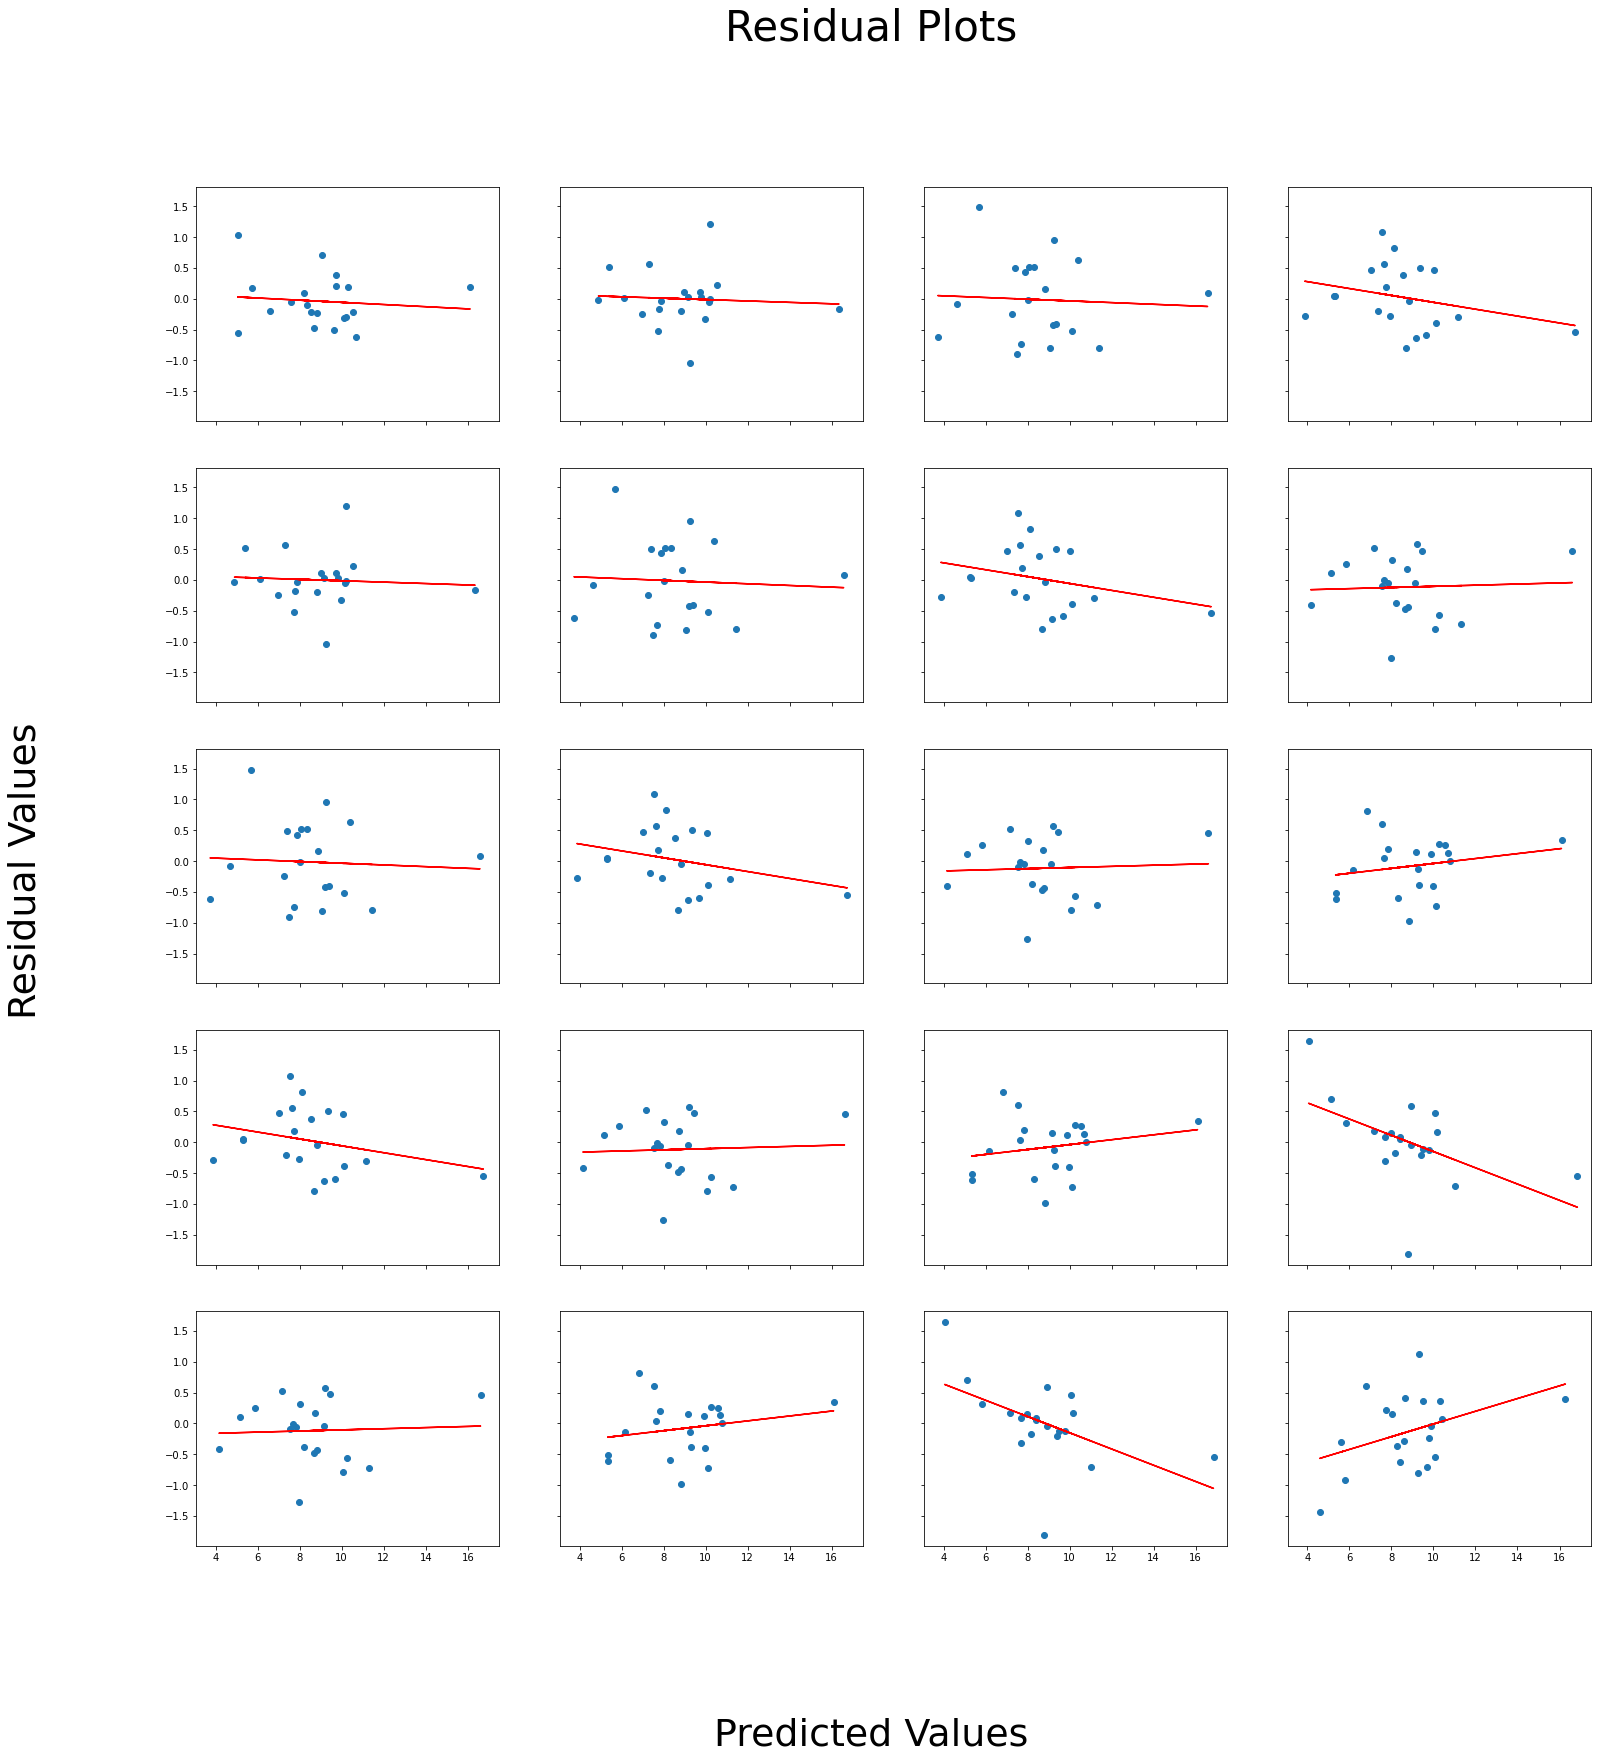

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def StackedResidualPlot(y_pred, y_test):
    # conert to np array with try/except
    ny_test = y_test.to_numpy() #what's with the try/except catch method used for?

    # calculate the residuals by column (variable)
    residual = y_pred - ny_test
    # predicted y on x axis and residual on y axis
    # go iteratively over row by row -- AKA sample by sample

    numRows = 5
    numCols = 4

    f = plt.figure()
    f, axes = plt.subplots(nrows = numRows, ncols = numCols, sharex = True, sharey = True, figsize=(25, 25))

    # axis and title
    f.suptitle('Residual Plots', fontsize=42)
    f.supxlabel('Predicted Values', fontsize=38) # reference: https://stackoverflow.com/a/65135433/15073477
    f.supylabel('Residual Values', fontsize=38)

    for row in range(numRows):
        for col in range(numCols):
            axes[row][col].scatter(y_pred[row+col], residual[row+col], marker = "o") #c = getRand(100)
            # create a horizontal line!!! - source: https://pythonguides.com/matplotlib-best-fit-line/
            theta = np.polyfit(y_pred[row+col], residual[row+col], 1) # 1 represents the degree
            y_line = theta[1] + theta[0] * y_pred[row+col] # it said theta[0] * X... not sure what X represents in my code
            axes[row][col].plot(y_pred[row+col], y_line, 'r')

    # add separate colorbar axes
    # cbar_ax = f.add_axes([0.85, 0.15, 0.05, 0.7])
    # f.colorbar(axes[0][0], cax=cbar_ax)

    plt.show()

StackedResidualPlot(y_pred, y_test)

# Create Partial Least Squares Regression

In [16]:
# Another tutorial with cross validation: https://www.statology.org/partial-least-squares-in-python/

# ml imports
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
# Source/documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cross_decomposition.PLSRegression.html
# Kinda useless now that I'm thinking about it since I'm just randomly guessing the number of components

from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=15)
pls2.fit(x_train, y_train)

pls2_y_pred = pls2.predict(x_test)

pls2.get_params()

{'copy': True,
 'max_iter': 500,
 'n_components': 15,
 'scale': True,
 'tol': 1e-06}

# Optimize Partial Least Squares - Source: https://nirpyresearch.com/partial-least-squares-regression-python/

In [18]:
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp) #should use nipals algorithm

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    
    return (y_cv, r2, mse)


In [19]:
# test with 30 components
r2s = []
mses = []
x, y = y_train.shape
xticks = np.arange(1, 30)
for n_comp in xticks:
    y_cv, r2, mse = optimise_pls_cv(x_train, y_train, n_comp)
    r2s.append(r2)
    mses.append(mse)

c:\Users\Amy\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',
c:\Users\Amy\anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:97: ConvergenceWarning: Maximum number of iterations reached
  warnings.warn('Maximum number of iterations reached',


In [20]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

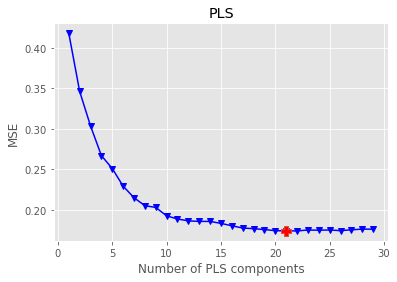

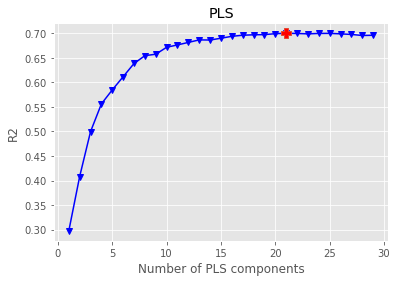

In [21]:
plot_metrics(mses, 'MSE', 'min')
plot_metrics(r2s, 'R2', 'max')

In [28]:
x_data = x_train.to_numpy().tolist() + x_test.to_numpy().tolist()
y_data = y_train.to_numpy().tolist() + y_test.to_numpy().tolist()
y_cv, r2, mse = optimise_pls_cv(x_data, y_data, 21) #21 depends on what the points of the previous code block show. Just grabbing the optimal values from the graph that it determined
print(r2)
print(mse)

0.7274063272928186
0.16356232938581045


# Using results, create optimal PLS regression

In [29]:
msemin = np.argmin(mses) #finds the minimum number of the MSE -- NOTE: THERE'S A DIFFERENCE BETWEEN mse AND mses

print("Number of components used: ", msemin+1)
pls_optimal = PLSRegression(n_components=msemin+1)

# fit entire dataset
pls_optimal.fit(x_train, y_train)
y_c = pls_optimal.predict(x_train)

# cross validation
y_cv_optimal = cross_val_predict(pls_optimal, x_train, y_train, cv = 10)

# calculate scores for calibration and cross-validation
score_c = r2_score(y_train, y_c)
score_cv_optimal = r2_score(y_train, y_cv_optimal)

# Calculate mean squared error for calibration and cross validation
mse_c = mean_squared_error(y_train, y_cv_optimal)
mse_cv = mean_squared_error(y_train, y_cv_optimal)

print('R2 calib: %5.3f'  % score_c)
print('R2 CV: %5.3f'  % score_cv_optimal)
print('MSE calib: %5.3f' % mse_c)
print('MSE CV: %5.3f' % mse_cv)

Number of components used:  21
R2 calib: 0.812
R2 CV: 0.700
MSE calib: 0.174
MSE CV: 0.174


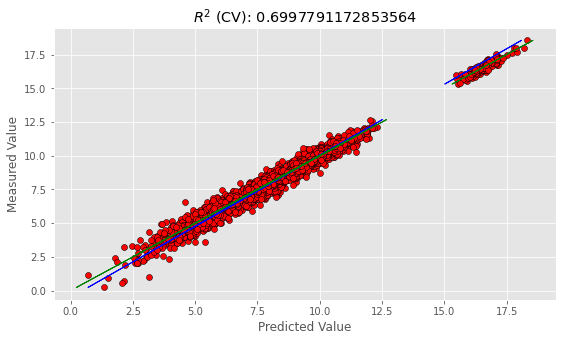

In [31]:
# Plot regression and figures of merit
rangey = y_train.max() - y_train.min()
rangex = np.amax(y_c) - np.amin(y_c)

# Fit a line to the CV vs response
z = np.polyfit(y_train.iloc[:, 0].to_numpy(), y_c[:, 0], 1)
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize=(9, 5))
    ax.scatter(y_c, y_train, c='red', edgecolors='k')
    #Plot the best fit line
    ax.plot(np.polyval(z,y_train), y_train, c='blue', linewidth=1)
    #Plot the ideal 1:1 line
    ax.plot(y_train, y_train, color='green', linewidth=1)
    plt.title('$R^{2}$ (CV): '+str(score_cv_optimal))
    plt.xlabel('Predicted Value')
    plt.ylabel('Measured Value')

    plt.show()

# Evaluate Partial Least Squares

In [32]:
y_pred_optimal = pls_optimal.predict(x_test)

RMSerror = MDRMSE(pd.DataFrame(y_pred_optimal), y_test)
percentError = PDE(y_pred_optimal, y_test.to_numpy())
R2_1 = R2_SCORE(y_pred_optimal, y_test, 'FOREST')
R2_2 = R2_SCORE(y_pred_optimal, y_test, 'PLS')
from sklearn.metrics import explained_variance_score
EXPLAINED_VARIANCE = explained_variance_score(y_test, y_pred_optimal)

print("Predicted values are all from initial \"PLS\" Regression")
print("Root Means Squared Error: ", end="")
print(RMSerror)
print("Percent Difference Error: ", end="")
print(percentError)
print("R2 SCORE - as a forest: ", end="")
print(R2_1)
print("R2 SCORE - as a PLS: ", end="")
print(R2_2)
print("Similar to R2 - Explained Variance: ", end="")
print(EXPLAINED_VARIANCE)

Predicted values are all from initial "PLS" Regression
Root Means Squared Error: 0.1709222552285539
Percent Difference Error: 4.272250869458874
R2 SCORE - as a forest: 0.7603303820867531
R2 SCORE - as a PLS: 0.7334754759727379
Similar to R2 - Explained Variance: 0.7367439311548541


In [33]:
# the results of the forest model are here:

RMSerror = MDRMSE(pd.DataFrame(y_pred), y_test)
percentError = PDE(y_pred, y_test.to_numpy())
R2_1 = R2_SCORE(y_pred, y_test, 'FOREST')
R2_2 = R2_SCORE(y_pred, y_test, 'PLS')

print("Predicted values are all from initial \"Forest\" model")
print("Root Means Squared Error: ", end="")
print(RMSerror)
print("Percent Difference Error: ", end="")
print(percentError)
print("R2 SCORE - as a forest: ", end="")
print(R2_1)
print("R2 SCORE - as a PLS: ", end="")
print(R2_2)

Predicted values are all from initial "Forest" model
Root Means Squared Error: 0.2993102508463322
Percent Difference Error: 5.469987582069285
R2 SCORE - as a forest: 0.5803029081149491
R2 SCORE - as a PLS: 0.52458382606413


In [34]:
# Evaluate RMSE given by the sklearn module
plsRMSE = SKLEARNRMSE(pls2_y_pred.transpose(), np.array(y_test.T))
forestRMSE = SKLEARNRMSE(y_pred.transpose(), np.array(y_test.T))

# print("PLS: " + plsRMSE)
# print("Forest: " + forestRMSE)

print(plsRMSE)
print(forestRMSE)

0.4021362188016008
0.5184757687883491


# Modifying the completeDataset.xlsx with Disease Factor

In [55]:
# recreate the data
import random
import pandas as pd

# convert the completeDataset.xlsx into a pandas dataframe because I don't want to redo the previous steps over and over again every time I reopen the notebook
selectDf = pd.read_excel("completeDatasetWithFactorV2.xlsx", index_col=0)

randNum = random.randrange(500)
# create 70/30 split of training and testing datasets
shuffledData = selectDf.sample(frac=1, random_state=42)

shuffledData.head()
x, y = shuffledData.shape
splitThreshold = round(x*.7)

TrainData = shuffledData.iloc[0:splitThreshold, :]
TestData = shuffledData.iloc[splitThreshold:, :]

# create input and output set (50/50) for now, but may change later
# randomize columns
tempShuffleDf = TrainData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=randNum)
TrainData = tempShuffleDf.T
tempShuffleDf = TestData.T
tempShuffleDf = tempShuffleDf.sample(frac=1, random_state=randNum)
TestData = tempShuffleDf.T

splitIndex = 80 #first {splitIndex} will be used as input variables

# split the data
x_train = TrainData.iloc[:, 0:splitIndex]
y_train = TrainData.iloc[:, splitIndex:]

x_test = TestData.iloc[:, 0:splitIndex]
y_test = TestData.iloc[:, splitIndex:]

In [56]:
from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=10)
pls2.fit(x_train, y_train)

pls2_y_pred_v2 = pls2.predict(x_test)

pls2.get_params()

{'copy': True,
 'max_iter': 500,
 'n_components': 10,
 'scale': True,
 'tol': 1e-06}

In [4]:
for row in pls2.x_weights_:
    print(row[0])

-0.08617344411958991
-0.09984722715573517
0.02633538391556032
-0.10912236758659974
-0.05926506279995324
0.11613991867675003
0.01095903444617476
-0.12726947284270637
0.16470104553538828
-0.16261730073878564
0.1586725441273285
-0.12285734294606526
0.08264892492981138
-3.175554002593454e-05
-0.12500550281422118
0.19979887333002438
-0.10437144771008997
-0.06622764308730782
0.1374741325701819
0.17061879411522504
-0.09651499136198802
-0.030808045080591998
-0.08071317330275886
-0.040317418870885066
-0.09510745486890683
-0.051900324404509056
-0.005984150891500086
-0.1282099905775882
0.17696336102151275
0.16045190968119916
-0.11720923391636134
-0.00017738078511832022
-0.016006834384623757
0.04160284024631571
-0.11772807606878166
0.06289193031440354
0.19712761108300747
0.039161589896520806
0.008719745058803836
-0.06781713488631326
0.1604025244603159
0.053492272841467674
-0.13847928107656
0.09050251114347665
-0.08901523878975813
-0.06313526699135444
-0.13753955842124868
-0.061007350408580845
-0.1

In [57]:
import numpy as np

RMSerror = MDRMSE(pd.DataFrame(pls2_y_pred_v2), y_test)
percentError = PDE(pls2_y_pred_v2, y_test.to_numpy())
R2_1 = R2_SCORE(pls2_y_pred_v2, y_test, 'FOREST')
R2_2 = R2_SCORE(pls2_y_pred_v2, y_test, 'PLS')
from sklearn.metrics import explained_variance_score
EXPLAINED_VARIANCE = explained_variance_score(y_test, pls2_y_pred_v2)

print("Predicted values are all from initial \"PLS\" Regression")
print("Root Means Squared Error: ", end="")
print(RMSerror)
print("Percent Difference Error: ", end="")
print(percentError)
print("R2 SCORE - as a forest: ", end="")
print(R2_1)
print("R2 SCORE - as a PLS: ", end="")
print(R2_2)
print("Similar to R2 - Explained Variance: ", end="")
print(EXPLAINED_VARIANCE)

# dataset without the disease factor
# Predicted values are all from initial "PLS" Regression
# Root Means Squared Error: 0.16531720606017014
# Percent Difference Error: 4.3879568203042165
# R2 SCORE - as a forest: 0.730736540577214
# R2 SCORE - as a PLS: 0.7110617544937284
# Similar to R2 - Explained Variance: 0.7162714275732749

# dataset with disease factor
# Predicted values are all from initial "PLS" Regression
# Root Means Squared Error: 0.15039945445145553
# Percent Difference Error: 3.7430838717752604
# R2 SCORE - as a forest: 0.7831257301605096
# R2 SCORE - as a PLS: 0.7713394506173104
# Similar to R2 - Explained Variance: 0.7735207440625719

# dataset with disease factor - just recently incorporated 6/4/2022
# Predicted values are all from initial "PLS" Regression
# Root Means Squared Error: 0.1996677718309814
# Percent Difference Error: 7.97632945228717
# R2 SCORE - as a forest: 0.7323897190776975
# R2 SCORE - as a PLS: 0.7220848095960279
# Similar to R2 - Explained Variance: 0.72708123797703

# another dataset with disease factor incorporated
# Predicted values are all from initial "PLS" Regression
# Root Means Squared Error: 0.15529384215418301
# Percent Difference Error: 3.752387421223123
# R2 SCORE - as a forest: 0.6850002260497448
# R2 SCORE - as a PLS: 0.6539923986119991
# Similar to R2 - Explained Variance: 0.6589420856396692

Predicted values are all from initial "PLS" Regression
Root Means Squared Error: 0.18036528417244696
Percent Difference Error: 3.5210137887594875
R2 SCORE - as a forest: 0.750075009926466
R2 SCORE - as a PLS: 0.7098572707872937
Similar to R2 - Explained Variance: 0.7163615381792144


# Save the Model using Pickle

In [58]:
# using pickle -- recommended https://medium.datadriveninvestor.com/machine-learning-how-to-save-and-load-scikit-learn-models-d7b99bc32c27
import pickle

# saving the file
filename = 'OPTIMAL_PLS_MODEL.sav'
pickle.dump(pls2, open(filename, 'wb'))

# loading the file
load_lr_model = pickle.load(open(filename, 'rb'))
y_load_predict = load_lr_model.predict(x_test)

RMSerror = MDRMSE(pd.DataFrame(y_load_predict), y_test)
percentError = PDE(y_load_predict, y_test.to_numpy())
R2_1 = R2_SCORE(y_load_predict, y_test, 'FOREST')
R2_2 = R2_SCORE(y_load_predict, y_test, 'PLS')
from sklearn.metrics import explained_variance_score
EXPLAINED_VARIANCE = explained_variance_score(y_test, y_load_predict)

print("Predicted values are all from initial \"PLS\" Regression")
print("Root Means Squared Error: ", end="")
print(RMSerror)
print("Percent Difference Error: ", end="")
print(percentError)
print("R2 SCORE - as a forest: ", end="")
print(R2_1)
print("R2 SCORE - as a PLS: ", end="")
print(R2_2)
print("Similar to R2 - Explained Variance: ", end="")
print(EXPLAINED_VARIANCE)

Predicted values are all from initial "PLS" Regression
Root Means Squared Error: 0.18036528417244696
Percent Difference Error: 3.5210137887594875
R2 SCORE - as a forest: 0.750075009926466
R2 SCORE - as a PLS: 0.7098572707872937
Similar to R2 - Explained Variance: 0.7163615381792144
